<a href="https://colab.research.google.com/github/viridis45/Python-data-analysis/blob/master/08082019_keras_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [0]:
#gspark@kw.ac.kr
import tensorflow as tf
from tensorflow import keras

fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


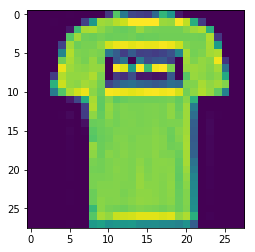

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
c = np.reshape(train_images[1], [28,28])
plt.imshow(c)


In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
len(np.unique(train_labels))  # <----number of classes

10

In [0]:
#train_labels=train_labels.reshape([60000,-1])

# With Keras

In [0]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()


xtrain=train_images.reshape(60000, 28*28).astype('float32')/255.0
xtest=test_images.reshape(10000, 28*28).astype('float32')/255.0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()


#model.compile(optimizer=SGD(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain, train_labels, epochs=6) 


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5524 - acc: 0.8078
Epoch 2/6
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4079 - acc: 0.8559
Epoch 3/6
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3657 - acc: 0.8689
Epoch 4/6
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3402 - acc: 0.8759
Epoch 5/6
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3197 - acc: 0.8842
Epoch 

In [0]:
#model.predict(xtest)

# without keras

In [0]:
#gspark@kw.ac.kr
import tensorflow as tf
from tensorflow import keras

fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()


xtrain=train_images.reshape(60000, 28*28).astype('float32')/255.0
xtest=test_images.reshape(10000, 28*28).astype('float32')/255.0

#train_labels=train_labels.reshape(60000, -1)
# train_labels=tf.one_hot(train_labels, depth=10)
# train_labels

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


In [0]:
test_images.shape
test_labels.shape

(10000, 10)

In [0]:
nb_classes = 10

x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])
w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hf = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)


is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))  
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

training_epochs = 15
batch_size = 300





sess= tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(xtrain.shape[0] / batch_size)

  for i in range(total_batch):
    batch_xs = xtrain[batch_size*(i) : batch_size*(i+1),:]
    batch_ys = train_labels[batch_size*(i) : batch_size*(i+1),:]

    costvalue , _ = sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})

    avg_cost += costvalue / total_batch

  print('Epoch :%4d' % (epoch+1), 'cost:','{:.9f}'.format(avg_cost))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 
print ('accuracy :', sess.run(accuracy, feed_dict={x:xtest, y:test_labels}))


Epoch :   1 cost: 4.019869355
Epoch :   2 cost: 1.828339805
Epoch :   3 cost: 1.544734859
Epoch :   4 cost: 1.393625230
Epoch :   5 cost: 1.293283251
Epoch :   6 cost: 1.219564488
Epoch :   7 cost: 1.162016358
Epoch :   8 cost: 1.115151587
Epoch :   9 cost: 1.075779247
Epoch :  10 cost: 1.041918312
Epoch :  11 cost: 1.012272585
Epoch :  12 cost: 0.985954202
Epoch :  13 cost: 0.962329510
Epoch :  14 cost: 0.940929820
Epoch :  15 cost: 0.921398095
accuracy : 0.7723


In [0]:
nb_classes = 10

x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])
w = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
h1 = tf.nn.softmax(tf.matmul(x,w)+b)


w1 = tf.Variable(tf.random_normal([nb_classes,20]))
b1 = tf.Variable(tf.random_normal([20]))
h2 = tf.nn.softmax(tf.matmul(h1,w1)+b1)


w2 = tf.Variable(tf.random_normal([20, nb_classes]))
b2 = tf.Variable(tf.random_normal([nb_classes]))
hf = tf.nn.softmax(tf.matmul(h2,w2)+b2)



cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)


is_correct = tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))  
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

training_epochs = 15
batch_size = 300



sess= tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(xtrain.shape[0] / batch_size)

  for i in range(total_batch):
    batch_xs = xtrain[batch_size*(i) : batch_size*(i+1),:]
    batch_ys = train_labels[batch_size*(i) : batch_size*(i+1),:]

    costvalue , _ = sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})

    avg_cost += costvalue / total_batch

  print('Epoch :%4d' % (epoch+1), 'cost:','{:.9f}'.format(avg_cost))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 
print ('accuracy :', sess.run(accuracy, feed_dict={x:xtest, y:test_labels}))
print ('nope nope nope nope')


Epoch :   1 cost: 2.366672981
Epoch :   2 cost: 2.155226734
Epoch :   3 cost: 2.064041992
Epoch :   4 cost: 1.978037542
Epoch :   5 cost: 1.903955130
Epoch :   6 cost: 1.844153414
Epoch :   7 cost: 1.797132639
Epoch :   8 cost: 1.759139465
Epoch :   9 cost: 1.727563143
Epoch :  10 cost: 1.699887443
Epoch :  11 cost: 1.675585813
Epoch :  12 cost: 1.655244241
Epoch :  13 cost: 1.640086127
Epoch :  14 cost: 1.627967757
Epoch :  15 cost: 1.618279379
accuracy : 0.2926
